## BPD Arrests

In [1]:
import pandas as pd
import numpy as np

import plotly.graph_objs as bp
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

%matplotlib inline
import matplotlib as plt
import matplotlib.pyplot as m_plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn import decomposition
from sklearn import manifold
import pylab as pl
import collections
from scipy.cluster import hierarchy
from sklearn import cluster
import seaborn as sns
from scipy.spatial.distance import pdist
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics.pairwise import pairwise_distances

from sklearn import linear_model, model_selection, preprocessing, metrics, datasets
from sklearn.multiclass import OneVsRestClassifier
import statsmodels.api as sm

from sklearn.model_selection import cross_val_score

import re
from datetime import datetime

import time

/home/payal/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



In [2]:
bpd = pd.read_csv('BPD_Arrests.csv')
bpd.head()

,Arrest,Age,Sex,Race,ArrestDate,ArrestTime,ArrestLocation,IncidentOffense,IncidentLocation,Charge,ChargeDescription,District,Post,Neighborhood,Longitude,Latitude,Location 1
0,17189199.0,22.0,M,B,12/02/2017,22:10,NaN,4ECOMMON ASSAULT,5600 WOODMONT AVE,1 1415,ASSAULT-SEC DEGREE,NaN,NaN,NaN,NaN,NaN,NaN
1,17189208.0,31.0,M,W,12/02/2017,22:00,NaN,Unknown Offense,NaN,NaN,DETAIN ONLY,NaN,NaN,NaN,NaN,NaN,NaN
2,17189157.0,24.0,M,B,12/02/2017,21:30,2400 S HANOVER ST,4ECOMMON ASSAULT,2400 S HANOVER ST,1 1415,SECOND DEGREE ASSAULT,Southern,943.0,Spring Garden Industrial Area,-76.614654,39.262926,"(39.2629257785832, -76.6146544968702)"
3,17189198.0,31.0,F,B,12/02/2017,21:20,1800 RUXTON AVE,4BAGG. ASSLT.- CUT,1800 RUXTON AVE,1 1415,ASSAULT 2ND,Western,723.0,Coppin Heights/Ash-Co-East,-76.655084,39.308620,"(39.3086195905312, -76.6550844329128)"
4,17189183.0,28.0,F,B,12/02/2017,21:15,1800 RUXTON AVE,4BAGG. ASSLT.- CUT,1800 RUXTON AVE,1 1415,ASSAULT SECOND,Western,723.0,Coppin Heights/Ash-Co-East,-76.655084,39.308620,"(39.3086195905312, -76.6550844329128)"


In [3]:
print(bpd.IncidentOffense.unique())


['4ECOMMON ASSAULT' 'Unknown Offense' '4BAGG. ASSLT.- CUT' '87NARCOTICS'
 '6CLARCENY- SHOPLIFTING' '5ABURG. RES. (FORCE)' '4DAGG. ASSLT.- HAND'
 '5DBURG. OTH. (FORCE)' '6JLARCENY- OTHER' '4AAGG. ASSLT.- GUN'
 '6ELARCENY- AUTO ACC' '118BURGLARY - FOURTH DEGREE' '3MROBB BANK (UA)'
 '4CAGG. ASSLT.- OTH.' '3CFROBB COMM-FIREARM' '5BBURG. RES. (ATT.)'
 '79OTHER' '3AFROBB HWY-FIREARM' '3CKROBB COMM-KNIFE' '23UNAUTHORIZED USE'
 '3AKROBB HWY-KNIFE' '7ASTOLEN AUTO' '3BROBB HIGHWAY (UA)'
 '3PROBB MISC. (UA)' '3BJROBB CARJACK(UA)' '3AJFROBB CARJACK-FIREARM'
 '54ARMED PERSON' '6GLARCENY- FROM BLDG.' '2FPLACING HANDS'
 '6DLARCENY- FROM AUTO' '3DROBB COMM. (UA)' '26RECOVERED VEHICLE'
 '5EBURG. OTH. (ATT.)' '3KROBB RES. (UA)' '2JOTHER SEX OFFN.' '1AMURDER'
 '8HARSON MOTOR VEH' '73FALSE PRETENSE' '88UNFOUNDED CALL'
 '97SEARCH & SEIZURE' '6FLARCENY- BICYCLE' '3JFROBB RESIDENCE-FIREARM'
 '87ONARCOTICS (OUTSIDE)' '61PERSON WANTED ON WAR'
 '3JOROBB RESIDENCE-OTHER WPN' '93ABDUCTION - OTHER'
 '83DISCHARGING

Relevent Offenses:

1. 6ELARCENY- AUTO ACC
2. 7ASTOLEN AUTO
3. 3BROBB HIGHWAY (UA)
4. 3BJROBB CARJACK(UA)
5. 3AJFROBB CARJACK-FIREARM
6. 6DLARCENY- FROM AUTO
7. 26RECOVERED VEHICLE
8. 8HARSON MOTOR VEH
9. 6FLARCENY- BICYCLE
10. 24TOWED VEHICLE
11. 3AOROBB HWY-OTHER WPN
12. 3AJKROBB CARJACK-KNIFE
13. 7CSTOLEN VEH./OTHER
14. 112TRAFFIC RELATED INCIDENT
15. 20JTRANSPORT
16. 3AJOROBB CARJACK-OTHER WPN
17. 3AF-Robb Hwy-Firea
18. 112-Traffic Related Inc
19. 112-Traffic Related Inciden
20. 33-Parking Complaint
21. 96-Investigative Stop
22. 96-Stop & Frisk
23. 107-Drunkenness
24. 112-Traffic Relate

In [4]:
bpd['IncidentOffense'] = bpd['IncidentOffense'].str.lower()
relevant_crimes = pd.DataFrame()

# list of relevant offenses and extract relevant rows

offense = ['6elarceny- auto acc','7astolenauto', '3brobb highway (ua)', '3bjrobb carjack (ua)','3ajfrobb carjack-firearm', '6dlarceny- from auto', '26recovered vehicle', '8harson motor veh', '6flarceny- bicycle', '24towed vehicle', '3aorobb hwy-other wpn', '3ajkrobb carjack-knife', '7cstolen veh./other', '112traffic related incident', '20jtransport', '3ajorobb carjack-other wpn', '3af-robb hwy-firea']

relevant_crimes = bpd[bpd['IncidentOffense'].isin(offense)]

print(relevant_crimes.count())

relevant_crimes.head()

Arrest               575
Age                  575
Sex                  575
Race                 575
ArrestDate           575
ArrestTime           575
ArrestLocation       490
IncidentOffense      575
IncidentLocation     551
Charge               564
ChargeDescription    575
District             488
Post                 488
Neighborhood         488
Longitude            488
Latitude             488
Location 1           488
dtype: int64


,Arrest,Age,Sex,Race,ArrestDate,ArrestTime,ArrestLocation,IncidentOffense,IncidentLocation,Charge,ChargeDescription,District,Post,Neighborhood,Longitude,Latitude,Location 1
118,17188685.0,41.0,M,B,12/01/2017,11:00,1500 S CLINTON ST,6elarceny- auto acc,1500 S CLINTON ST,1 0521,POSS. OF STOLEN TAG,Southeastern,233.0,Canton Industrial Area,-76.569266,39.274955,"(39.2749553089948, -76.5692660828697)"
272,17186841.0,25.0,M,B,11/28/2017,18:30,300 S PAYSON ST,6elarceny- auto acc,S MONROE ST & WILKENS AV,1 0521,STOLEN TAG,Southern,934.0,Carrollton Ridge,-76.648481,39.284093,"(39.2840933955883, -76.6484805028222)"
321,17186190.0,21.0,M,B,11/27/2017,19:50,900 E FORT AVE,3brobb highway (ua),0 E PRATT ST,1 1415,SECOND DEGREE ASSAULT,Southern,943.0,Riverside,-76.601254,39.271660,"(39.2716601526149, -76.6012543197748)"
366,17185577.0,20.0,M,B,11/27/2017,08:00,3600 HANOVER ST,3ajfrobb carjack-firearm,0 CHERRY HILL RD,2 2411,STOLEN AUTO,Southern,913.0,Brooklyn,-76.609609,39.238455,"(39.2384548587681, -76.6096086922886)"
381,17185340.0,40.0,F,W,11/26/2017,18:45,0 W HUGHES ST,6elarceny- auto acc,W HUGHES ST & S HANOVER ST,1 1137,THEFT $100-1499,Southern,941.0,Otterbein,-76.615826,39.280415,"(39.2804146755379, -76.6158263121215)"


## BPD Victim Based Data

In [5]:
bpd_v = pd.read_csv("BPD_Victim.csv")

bpd_v.head()

print(bpd_v['Description'].unique())


['COMMON ASSAULT' 'LARCENY' 'ROBBERY - STREET' 'AGG. ASSAULT'
 'LARCENY FROM AUTO' 'HOMICIDE' 'BURGLARY' 'AUTO THEFT'
 'ROBBERY - RESIDENCE' 'ROBBERY - COMMERCIAL' 'ROBBERY - CARJACKING'
 'ASSAULT BY THREAT' 'SHOOTING' 'RAPE' 'ARSON']


Relevant Descriptions:

1. LARCENY FROM AUTO
2. AUTO THEFT
3. ROBBERY - CARJACKING

In [6]:
# get relevant victim based data

rel_bpd_v = bpd_v[bpd_v['Description'].isin(['LARCENT FROM AUTO', 'AUTO THEFT', 'ROBBERY - CARJACKING'])]

print(rel_bpd_v.count())

rel_bpd_v.head()

CrimeDate          29655
CrimeTime          29655
CrimeCode          29655
Location           29247
Description        29655
Inside/Outside     28415
Weapon              1329
Post               29622
District           29647
Neighborhood       29175
Longitude          29247
Latitude           29247
Location 1         29247
Premise            28415
Total Incidents    29655
dtype: int64


,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
32,12/02/2017,17:15:00,7A,1200 KITMORE RD,AUTO THEFT,O,NaN,413.0,NORTHEASTERN,New Northwood,-76.59845,39.35031,"(39.3503100000, -76.5984500000)",STREET,1
45,12/02/2017,12:06:00,7A,6500 HARFORD RD,AUTO THEFT,O,NaN,424.0,NORTHEASTERN,Westfield,-76.55343,39.36166,"(39.3616600000, -76.5534300000)",STREET,1
76,12/01/2017,21:40:00,3AJF,2700 RITTENHOUSE AVE,ROBBERY - CARJACKING,NaN,FIREARM,923.0,SOUTHERN,Lakeland,-76.64302,39.25495,"(39.2549500000, -76.6430200000)",NaN,1
81,12/01/2017,21:03:00,7A,4300 PARK HEIGHTS AVE,AUTO THEFT,O,NaN,533.0,NORTHWESTERN,Central Park Heights,-76.66601,39.33926,"(39.3392600000, -76.6660100000)",ALLEY,1
110,12/01/2017,17:00:00,7A,2600 AISQUITH ST,AUTO THEFT,O,NaN,411.0,NORTHEASTERN,Coldstream Homestead Mont,-76.59638,39.31915,"(39.3191500000, -76.5963800000)",STREET,1


### Arrests VS Victim Based Data

In [12]:
#Plot incident locations on map of baltimore

bpd_lon = relevant_crimes['Longitude'].tolist()
bpd_lat = relevant_crimes['Latitude'].tolist()

bpd_v_lon = rel_bpd_v['Longitude'].tolist()
bpd_v_lat = rel_bpd_v['Latitude'].tolist()
     

data = bp.Data([
    bp.Scattermapbox(
        lat=bpd_v_lat,
        lon=bpd_v_lon,
        mode='markers',
        marker=bp.Marker(
            size=14
        ),
        text=['Montreal'],
        name='Victim-based'
    ),
    bp.Scattermapbox(
        lat=bpd_lat,
        lon=bpd_lon,
        mode='markers',
        marker=bp.Marker(
            size=14
        ),
        text=['Montreal'],
        name='Arrests'
    )
])

layout = bp.Layout(
    title='Arrests vs Reported Traffic Crimes',
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken='pk.eyJ1IjoicHNpbmdocGF5YWwiLCJhIjoiY2o5MzhtamF5M3RhcTJ4bXJsdnA2Z3ZjbiJ9.lwJJeMpfCBEaxF-A7tRqBw',
        bearing=0,
        center=dict(
            lat=39.286138,
            lon=-76.603388
        ),
        pitch=0,
        zoom=5
    ),
)

fig = dict( data=data, layout=layout )
iplot( fig, validate=False, filename='Arrests vs Reported Traffic Crimes' )

## CCTV Locations in Baltimore

In [13]:
cctv = pd.read_csv("CCTV_Locations.csv")

cctv.head()

,cameraLocation,cameraNumber,cameraProject,Location 1
0,Eutaw and Lexington Market,1,Downtown,"(39.290996, -76.621073999999993)"
1,Eutaw and Fayette,2,Downtown,"(39.29048796517317, -76.623665143680341)"
2,Eutaw and Baltimore,3,Downtown,"(39.289324000000001, -76.620985000000005)"
3,Eutaw and Redwood,4,Downtown,"(39.288677999999997, -76.620947999999999)"
4,Eutaw and Lombard,5,Downtown,"(39.287528000000002, -76.620853999999994)"


In [14]:
cctv_lat = []
cctv_lon = []

cctv_loc = cctv['Location 1'].tolist()

for index in range(len(cctv)):
     cctv_lat.append(float(cctv_loc[index].split(",")[0][1:]))
     cctv_lon.append(float(cctv_loc[index].split(",")[1][:-1]))
    
#Plot permit locations on map of baltimore
data = bp.Data([
    bp.Scattermapbox(
        lat=cctv_lat,
        lon=cctv_lon,
        mode='markers',
        marker=bp.Marker(
            size=14
        ),
        text=['Montreal'],
    )
])

layout = bp.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken='pk.eyJ1IjoicHNpbmdocGF5YWwiLCJhIjoiY2o5MzhtamF5M3RhcTJ4bXJsdnA2Z3ZjbiJ9.lwJJeMpfCBEaxF-A7tRqBw',
        bearing=0,
        center=dict(
            lat=39.286138,
            lon=-76.603388
        ),
        pitch=0,
        zoom=5
    ),
)

fig = dict( data=data, layout=layout )
iplot( fig, validate=False, filename='CCTV_Locations' )

## Find best locations for CCTV cameras based on crime and citation data

Get high crime/citation areas from crimes/citations datasets, then check if there is a cctv camera there. If there is, map that point in a different color, if there isn't, then a different color


In [12]:
bpd = pd.read_csv('BPD_Arrests.csv')

bpd['IncidentOffense'] = bpd['IncidentOffense'].str.lower()
relevant_crimes = pd.DataFrame()

# list of relevant offenses and extract relevant rows

offense = ['6elarceny- auto acc','7astolenauto', '3brobb highway (ua)', '3bjrobb carjack (ua)','3ajfrobb carjack-firearm', '6dlarceny- from auto', '26recovered vehicle', '8harson motor veh', '6flarceny- bicycle', '24towed vehicle', '3aorobb hwy-other wpn', '3ajkrobb carjack-knife', '7cstolen veh./other', '112traffic related incident', '20jtransport', '3ajorobb carjack-other wpn', '3af-robb hwy-firea']

relevant_crimes = bpd[bpd['IncidentOffense'].isin(offense)]

relevant_crimes.count()

Arrest               575
Age                  575
Sex                  575
Race                 575
ArrestDate           575
ArrestTime           575
ArrestLocation       490
IncidentOffense      575
IncidentLocation     551
Charge               564
ChargeDescription    575
District             488
Post                 488
Neighborhood         488
Longitude            488
Latitude             488
Location 1           488
dtype: int64

In [13]:
#Plot incident locations on map of baltimore
bpd_lon = relevant_crimes['Longitude'].tolist()
bpd_lat = relevant_crimes['Latitude'].tolist()

data = bp.Data([
    bp.Scattermapbox(
        lat=bpd_lat,
        lon=bpd_lon,
        mode='markers',
        marker=bp.Marker(
            size=14
        ),
        text=['Montreal'],
    ),
    bp.Scattermapbox(
        lat=cctv_lat,
        lon=cctv_lon,
        mode='markers',
        marker=bp.Marker(
            size=14
        ),
        text=['Montreal'],
    )
])

layout = bp.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken='pk.eyJ1IjoicHNpbmdocGF5YWwiLCJhIjoiY2o5MzhtamF5M3RhcTJ4bXJsdnA2Z3ZjbiJ9.lwJJeMpfCBEaxF-A7tRqBw',
        bearing=0,
        center=dict(
            lat=39.286138,
            lon=-76.603388
        ),
        pitch=0,
        zoom=5
    ),
)

fig = dict( data=data, layout=layout )
iplot( fig, validate=False, filename='Relevant_Crimes' )

## K-Means Clustering for CCTV locations vs clusters for crimes

In [15]:
cctv = pd.read_csv("CCTV_Locations.csv")

cctv['lat'] = pd.DataFrame(cctv_lat)
cctv['lon'] = pd.DataFrame(cctv_lon)
del cctv['Location 1']

cctv.head()

,cameraLocation,cameraNumber,cameraProject,lat,lon
0,Eutaw and Lexington Market,1,Downtown,39.290996,-76.621074
1,Eutaw and Fayette,2,Downtown,39.290488,-76.623665
2,Eutaw and Baltimore,3,Downtown,39.289324,-76.620985
3,Eutaw and Redwood,4,Downtown,39.288678,-76.620948
4,Eutaw and Lombard,5,Downtown,39.287528,-76.620854


In [16]:
kmeans = KMeans(n_clusters=5).fit(cctv[['lat', 'lon']])

In [20]:
km_clusters = kmeans.labels_

print("Inertia = " + str(kmeans.inertia_))
km_clusters

Inertia = 0.113028500029


array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3,

In [26]:
def kmeans_scatterplot(x, y, map_col, label_x, label_y):
    m_plt.scatter(x, y, c=map_col)
    m_plt.xlabel(label_x)
    m_plt.ylabel(label_y)
    m_plt.title('KMeans Clustering')
    m_plt.show()

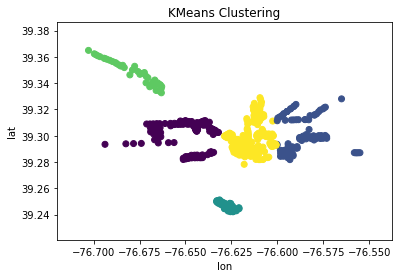

In [27]:
kmeans_scatterplot(cctv_lon, cctv_lat, km_clusters, 'lon', 'lat')

In [28]:
cctv_cluster_centers = kmeans.cluster_centers_

type(cctv_cluster_centers)

numpy.ndarray

In [29]:
bpd_1 = relevant_crimes.dropna()

kmeans = KMeans(n_clusters=5).fit(bpd_1[['Latitude', 'Longitude']])

Inertia = 0.255734691343


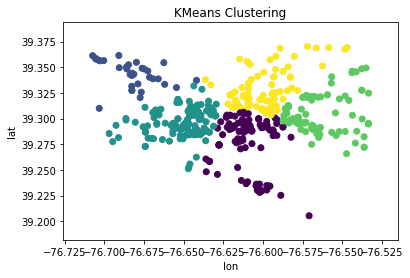

In [30]:
km_clusters = kmeans.labels_
print("Inertia = " + str(kmeans.inertia_))
kmeans_scatterplot(bpd_1['Longitude'], bpd_1['Latitude'], km_clusters, 'lon', 'lat')


In [31]:
arrests_cluster_centers = kmeans.cluster_centers_

a = pd.DataFrame(arrests_cluster_centers, columns=['lat', 'lon'])
b = pd.DataFrame(cctv_cluster_centers, columns=['lat', 'lon'])

## Areas with more traffic related arrests have more cctv cameras ?

In [ ]:
# Scatter plot - TODO - size of points proportional to cluster size

cctv_lon = a['lon'].tolist()
cctv_lat = a['lat'].tolist()

bpd_lon = b['lon'].tolist()
bpd_lat = b['lat'].tolist()

data = bp.Data([
    bp.Scattermapbox(
        lat=bpd_lat,
        lon=bpd_lon,
        mode='markers',
        marker=bp.Marker(
            size=14
        ),
        text=['Montreal'],
    ),
    bp.Scattermapbox(
        lat=cctv_lat,
        lon=cctv_lon,
        mode='markers',
        marker=bp.Marker(
            size=14
        ),
        text=['Montreal'],
    )
])

layout = bp.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken='pk.eyJ1IjoicHNpbmdocGF5YWwiLCJhIjoiY2o5MzhtamF5M3RhcTJ4bXJsdnA2Z3ZjbiJ9.lwJJeMpfCBEaxF-A7tRqBw',
        bearing=0,
        center=dict(
            lat=39.286138,
            lon=-76.603388
        ),
        pitch=0,
        zoom=5
    ),
)

fig = dict( data=data, layout=layout )
iplot( fig, validate=False, filename='Relevant_Crimes' )

## Residential Parking Permits